In [1]:
import os  # 处理字符串路径
import glob  # 查找文件
from keras.models import Sequential  # 导入Sequential模型
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from pandas import Series, DataFrame
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils, generic_utils
from six.moves import range


Using TensorFlow backend.
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chibaryowei/anaconda3/lib/pytho

In [159]:
'''
------------------
# loading dataset
------------------
'''

import os
from PIL import Image
import cv2
import numpy as np

def load_data():

    imgs = os.listdir("./data2/train/")
    num = len(imgs)
    data = np.empty((num,224,224,3),dtype="float32")
    label = np.empty((num,))
    for i in range(num):
        img = cv2.imread("./data2/train/" + imgs[i])
        arr = np.asarray(img, dtype="float32")
        arr.resize((224,224,3))
        data[i, :, :, :] = arr

        if imgs[i].split('.')[0] == 'cat':
            label[i] = 1 # cat
            
        else:
            label[i] = 0 # dog
            
    return data,label

In [160]:
data,label = load_data()
print(data.shape)

(4001, 224, 224, 3)


In [100]:
from sklearn.model_selection import train_test_split
train_data, validation_data, train_labels, validation_labels = train_test_split(data, label, test_size = 0.25, random_state = 10)

In [101]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

num_classes = 2

train_data = train_data.astype('float32')
validation_data = validation_data.astype('float32')

train_data /= 255
validation_data /= 255

print('train_data shape:', train_data.shape)
print(train_data.shape[0], 'train samples')
print(validation_data.shape[0], 'test samples')

# convert class vectors to binary class matrices
#train_labels = keras.utils.to_categorical(train_labels, num_classes)
#validation_labels = keras.utils.to_categorical(validation_labels, num_classes)


train_data shape: (3000, 224, 224, 3)
3000 train samples
1001 test samples


In [201]:
model = Sequential()


model.add(Convolution2D(4, 5, 5, input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(8, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (5, 5), input_shape=(224, 224,...)`
  after removing the cwd from sys.path.
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3))`
  
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  if sys.path[0] == '':


In [202]:

#model.compile(loss = 'binary_crossentropy', 
#              optimizer = sgd,
#              matrics = ['accuracy'])

optimizer = keras.optimizers.Adam(lr = 0.01)
#from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.6, nesterov=True)
#model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=sgd)

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [203]:
model.fit(train_data, train_labels, 
          epochs = 5, 
          batch_size = 150, 
          validation_data = (validation_data, validation_labels),
          shuffle = True)

Train on 3000 samples, validate on 1001 samples
Epoch 1/5
3000/3000 [==============================] - 59s 20ms/step - loss: 0.7601 - acc: 0.5040 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/5
3000/3000 [==============================] - 74s 25ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/5
3000/3000 [==============================] - 82s 27ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/5
3000/3000 [==============================] - 71s 24ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/5
3000/3000 [==============================] - 59s 20ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


In [204]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]



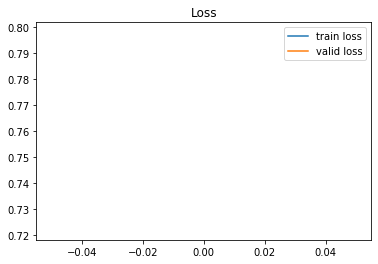

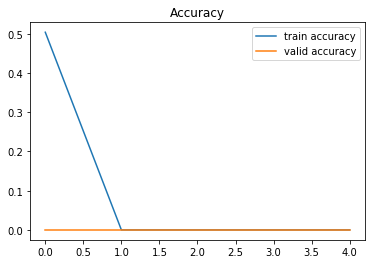

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()



In [206]:
model.save('my_model.h5') 

In [207]:
from keras.models import load_model


# 載入模型
model2 = load_model('my_model.h5')


In [208]:
def load_test_data():
    
    imgs = os.listdir("./data2/test/")
    num = len(imgs)
    data = np.empty((num,224,224,3),dtype="float32")
    
    for i in range(num):
        img = cv2.imread("./data2/test/" + imgs[i])
        arr = np.asarray(img, dtype="float32")
        
        arr.resize((224,224,3))
        data[i, :, :, :] = arr
    
    return data


In [209]:
test_data = load_test_data()

In [210]:
# making predictions
prediction = model2.predict(test_data)

In [211]:
import pandas as pd 
prediction = pd.DataFrame(prediction)

In [212]:
prediction

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
prediction.to_csv("path/to/file.csv") 